# Классификация - и снова в бой!


Сегодня мы поговорим о том, чему же мы научились за последние практики?

Мы освоили основным методы работы как с данными, на основе которых можно решить задачу классификации, так и с моделями, которые это делают! Щикарррно!

Сегодняшняя задачка как всегда несложная, но очень важная - нам предстоит предсказывать болезни сердца!

В вашем распоряжении датасет [Heart Disease UCI](https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci). Ваша задача предсказать, есть ли у человека заболевание сердца или нет.

Как всегда, ждем от вас полноценного анализа исходных данных, подготовка необходимой предобработки, feature engineering и поиск лучшего варианта, которный даст наибольшую метрику!

* Задача под звездочкой. Попробуйте реализовать такую систему, которая реже пропускает больных пациентов - мы ведь не хотим больным людям говорить, что они здоровы, хотя это не так?

Мы желаем вам удачи - постарайтесь применить все накопленные знания и, может, чуть больше! Успехов!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import random

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [2]:
df = pd.read_csv('heart_cleveland_upload.csv')
df.shape

(297, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
X = df.drop(columns=['condition'])
y = df['condition']
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Анализ данных

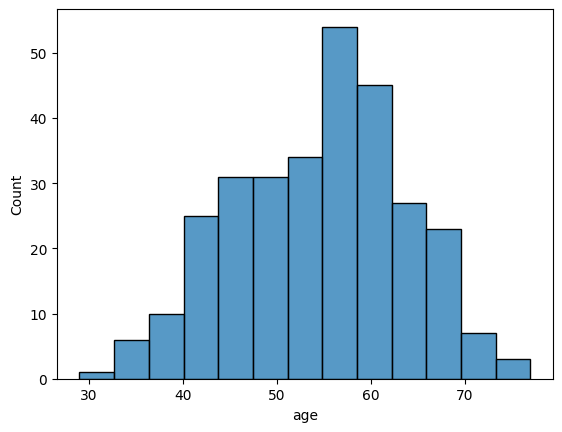

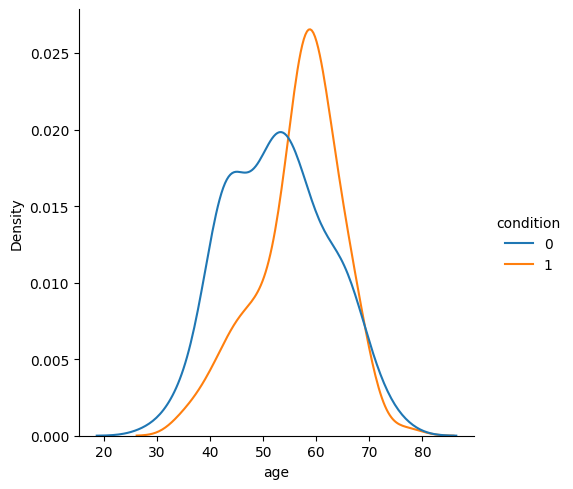

In [5]:
# Возраст имеет линейный порядок, но мало вероятно, что болезни сердца связаны с возрастом линейно.
# Гораздо важнее, что люди определенного возраста попадают в группу риска по болезням сердца.
# Можно составить дополнительные категориальные переменные, отвечающие за возрастную группу.
sns.histplot(df['age'])
#sns.boxplot(data=df, x='age', y='condition')
sns.displot(df, x='age', hue='condition', kind='kde')

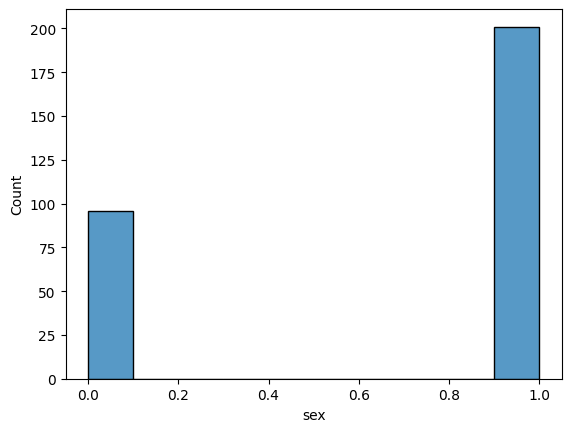

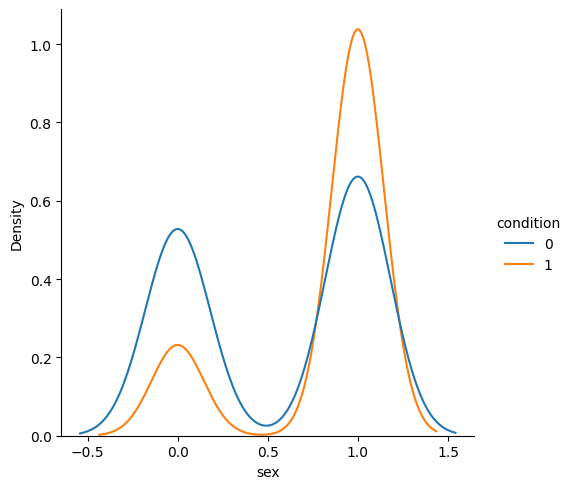

In [6]:
# Этот признак нужно закодировать OneHotEncoding, чтобы убрать порядок 1 > 0.
sns.histplot(df['sex'])
# Либо оставить как есть, потому что у sex=1 больше вероятность быть condition=1
sns.displot(df, x='sex', hue='condition', kind='kde')

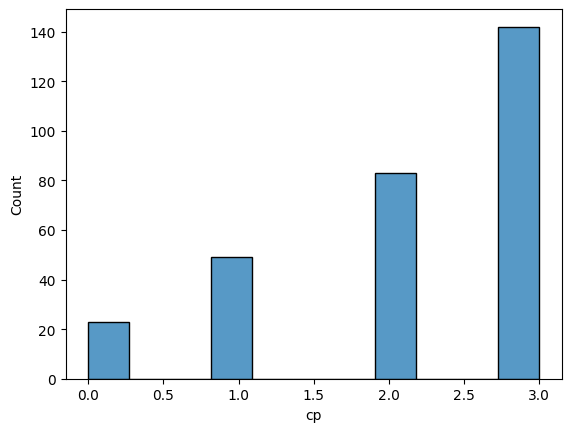

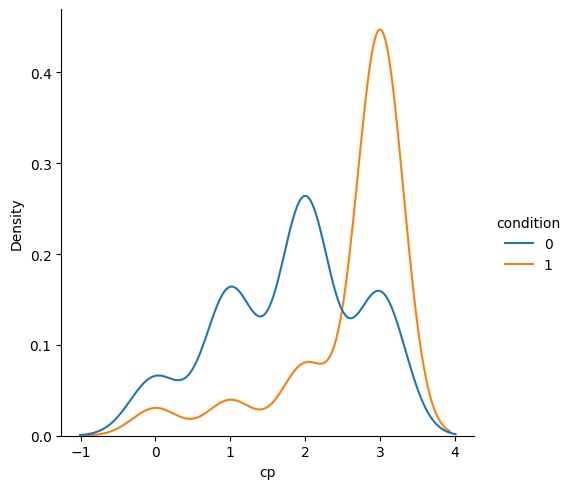

In [7]:
# Тип боли в груди. Скорее всего тоже следует закодировать как OneHotEncoding.
sns.histplot(df['cp'])
# Либо попробовать объединить все что меньше 3 в один признак
sns.displot(df, x='cp', hue='condition', kind='kde')

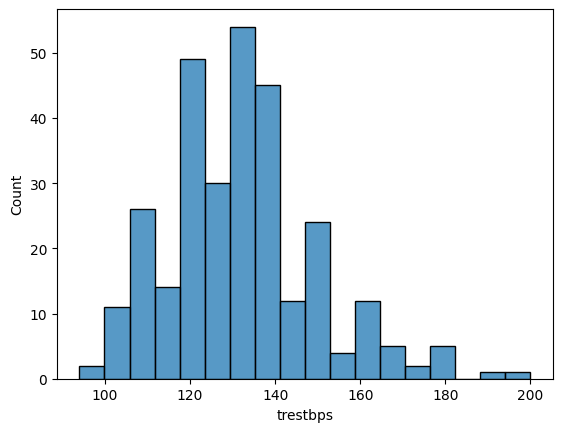

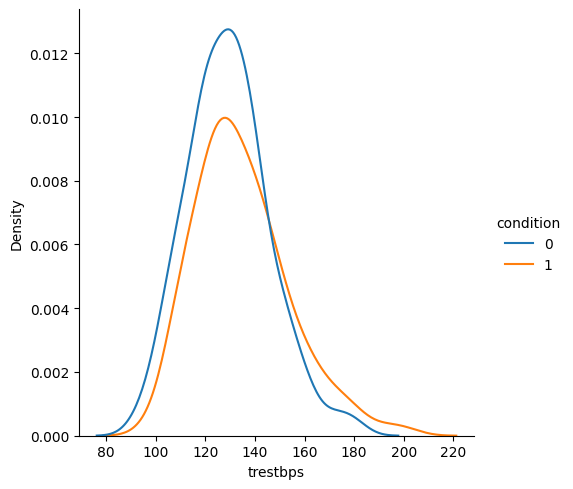

In [8]:
# Артериальное давление. Выглядит почти как нормальное распределение. Выбросы можно отследить
sns.histplot(df['trestbps'])
# Судя по всему, будет мало информативный признак, но можно попробавть взять порог в 150.
sns.displot(df, x='trestbps', hue='condition', kind='kde')

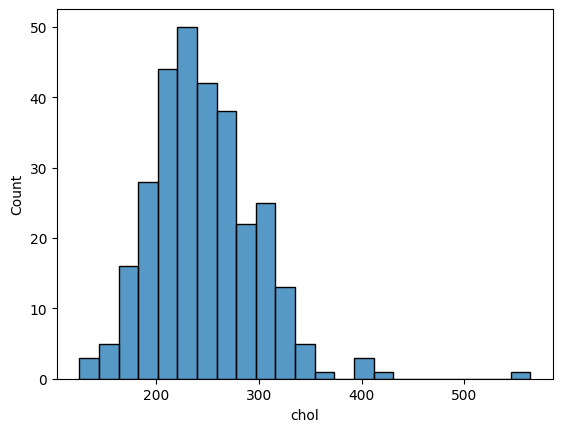

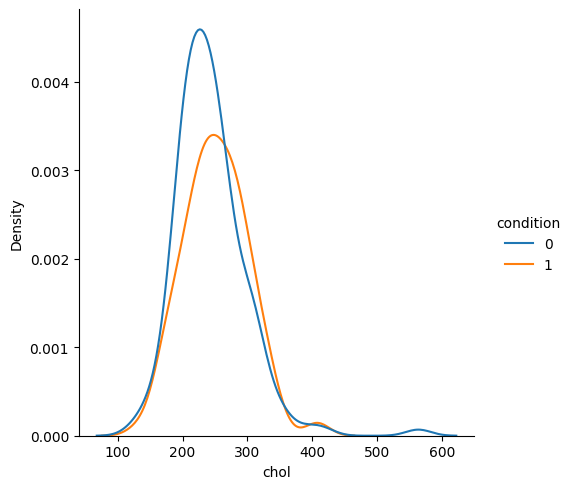

In [9]:
# Холестерин. Можно попробовать отловить выбросы, но не выбрасывать их, а наоборот учитывать по особенному.
# Судя по всему, будет мало информативный признак, но можно обртатить внимание на выбросы
sns.histplot(df['chol'])
sns.displot(df, x='chol', hue='condition', kind='kde')

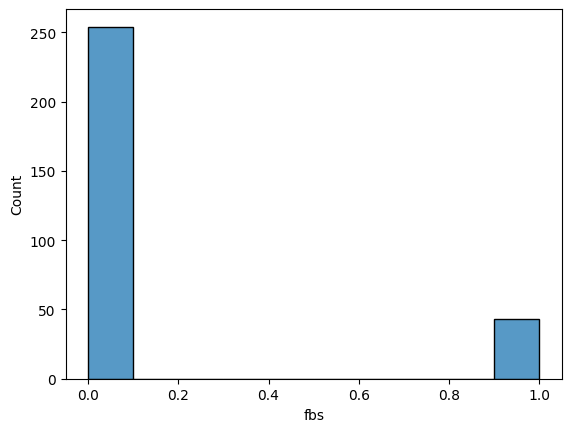

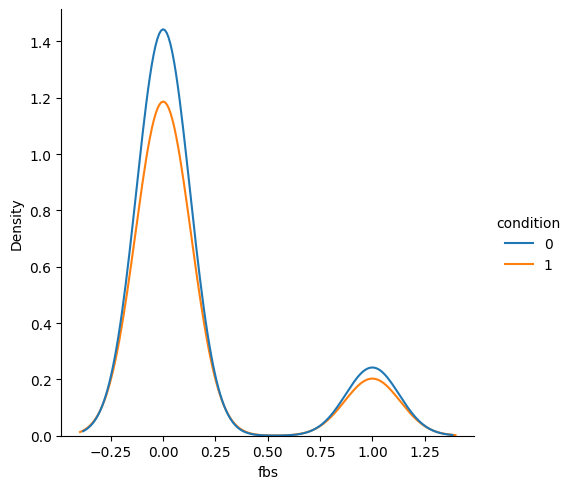

In [10]:
# Уровень сахара в крови > 120 мг/дл. Возможно неинформативный признак.
sns.histplot(df['fbs'])
# Похоже, что не информативный признак
sns.displot(df, x='fbs', hue='condition', kind='kde')

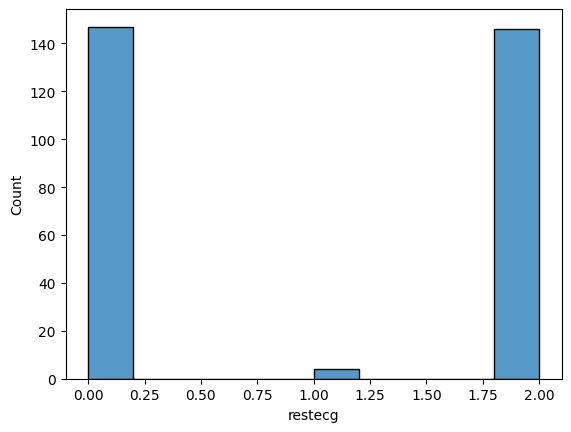

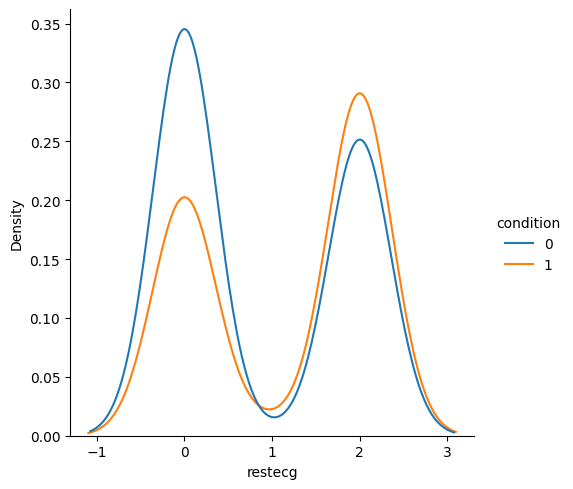

In [11]:
# Результаты электрокардиографии. Так как 1 очень мало, то их можно объединить с 2 и получить категорию 'есть проблемы по электрокардиографии'
sns.histplot(df['restecg'])
sns.displot(df, x='restecg', hue='condition', kind='kde')

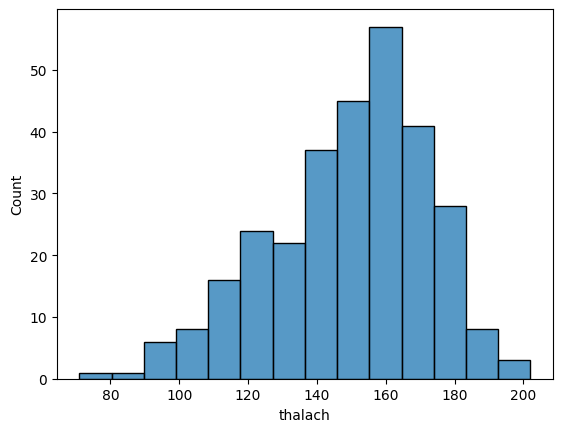

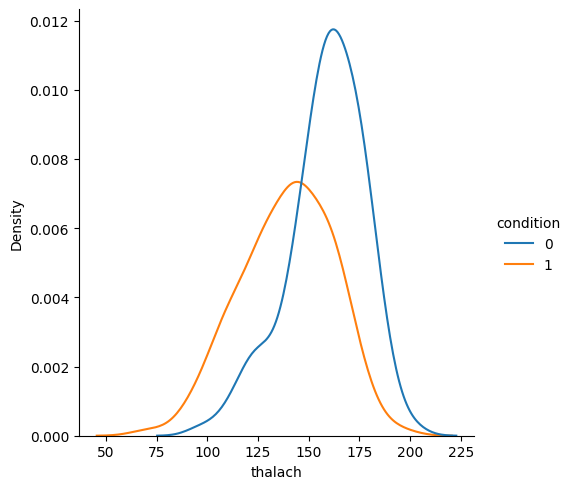

In [12]:
# Немного смещенное нормальное распределение. Можно попробовать PowerTransformer
# Может оказаться хорошим признаком
sns.histplot(df['thalach'])
sns.displot(df, x='thalach', hue='condition', kind='kde')

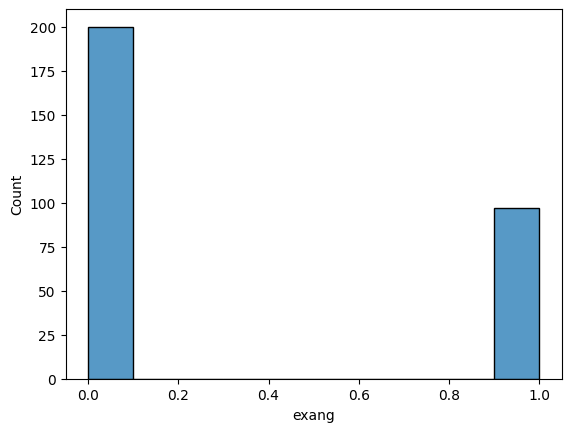

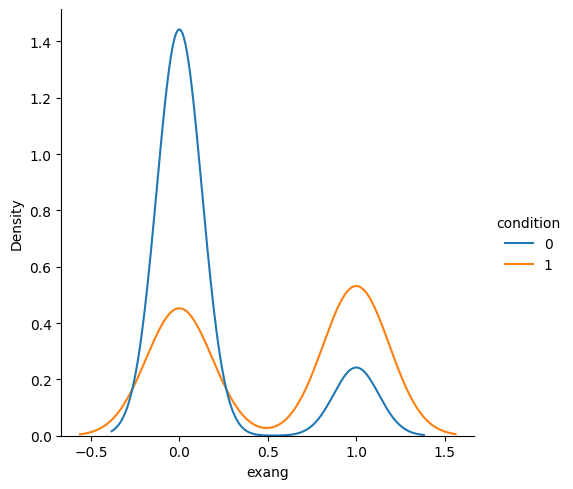

In [13]:
# Стенокардия, вызванная физическими нагрузками
# Тоже хороший признак
sns.histplot(df['exang'])
sns.displot(df, x='exang', hue='condition', kind='kde')

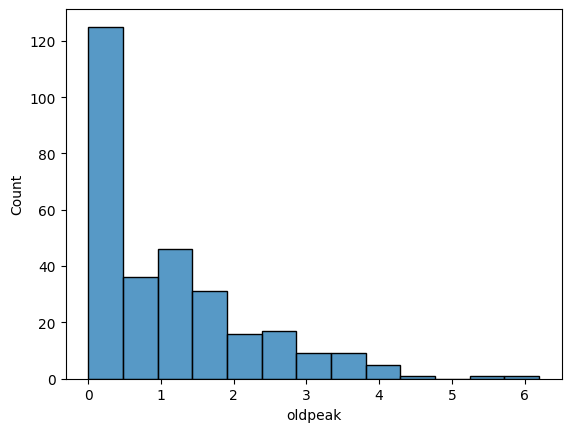

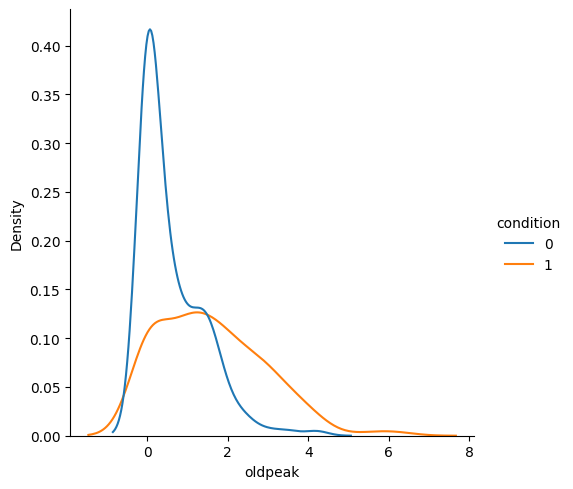

In [14]:
# Похожее на лог-нормальное распределение. Можно попробовать прологарифмировать чтобы получить нормальное.
# Или попробовать преобразовать в категориальный признак <>2
sns.histplot(df['oldpeak'])
sns.displot(df, x='oldpeak', hue='condition', kind='kde')

C:\Users\Tolya\AppData\Local\Temp\ipykernel_13876\3074061229.py:2: RuntimeWarning: divide by zero encountered in log
  sns.histplot(np.log(df['oldpeak'].values))
C:\Users\Tolya\AppData\Local\Temp\ipykernel_13876\3074061229.py:3: RuntimeWarning: divide by zero encountered in log
  sns.displot(df, x=np.log(df['oldpeak'].values), hue='condition', kind='kde')


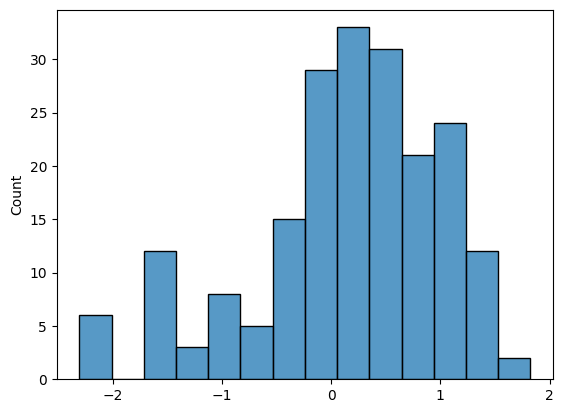

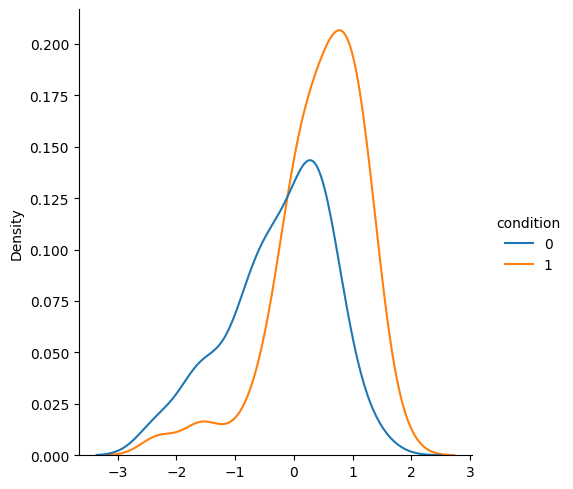

In [15]:
# Лучше не стало
sns.histplot(np.log(df['oldpeak'].values))
sns.displot(df, x=np.log(df['oldpeak'].values), hue='condition', kind='kde')

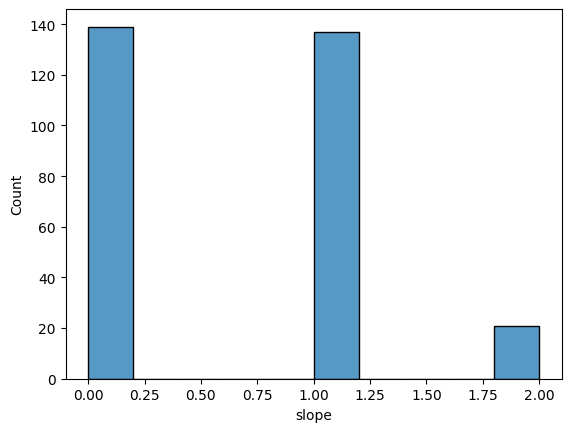

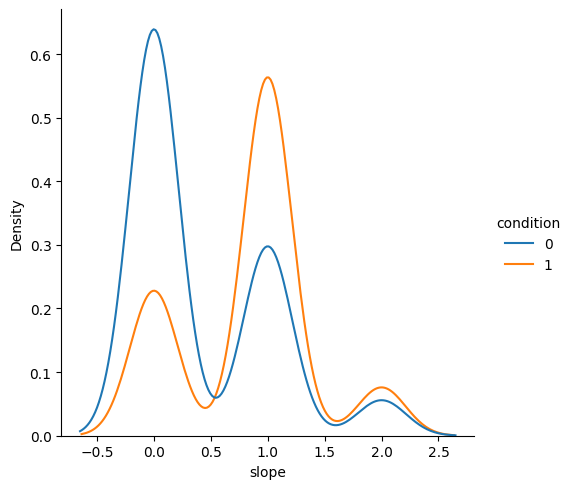

In [16]:
# Наклон сегмента. Стоит закодировать OneHotEncoding или 1 и 2 объединить в 1 признак
# Хороший признак
sns.histplot(df['slope'])
sns.displot(df, x=df['slope'], hue='condition', kind='kde')

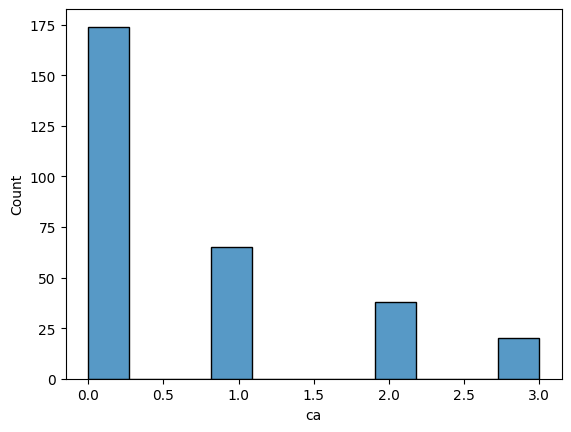

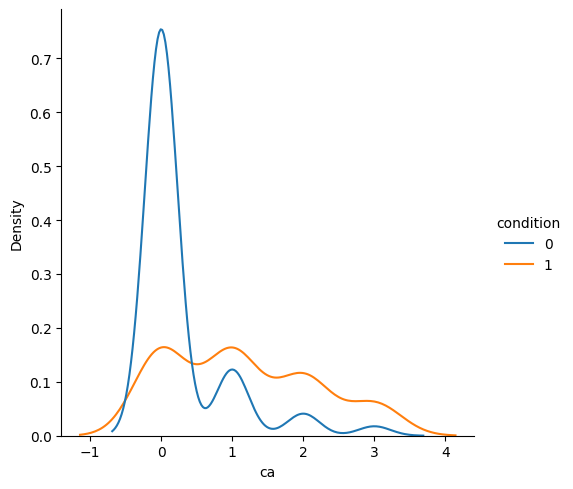

In [17]:
# Количество крупных сосудов (0-3), окрашенных при флюороскопии. Можно оставить как порядковый признак.
sns.histplot(df['ca'])
# Хотя скорее всего, нас будет интересовать равен он 0 или нет
sns.displot(df, x=df['ca'], hue='condition', kind='kde')

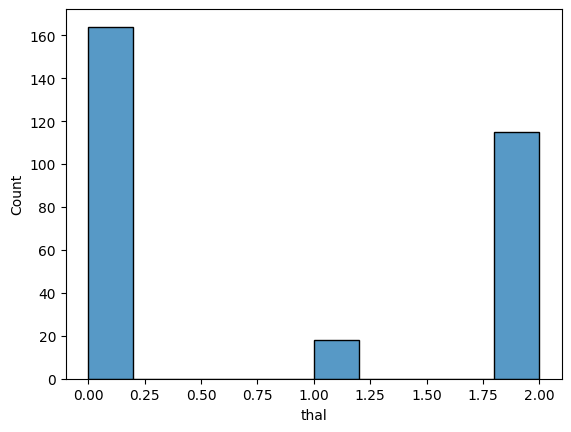

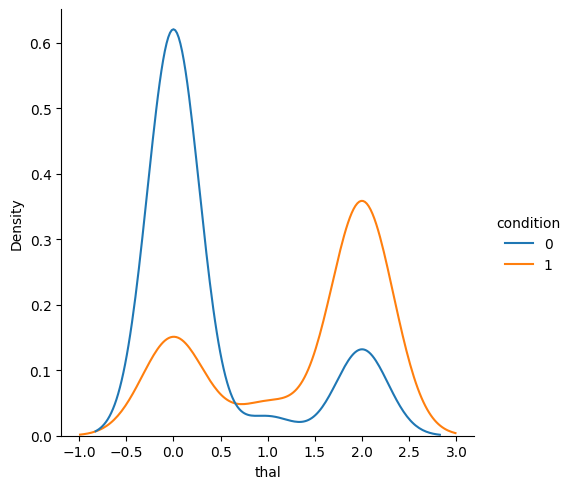

In [18]:
# Нормальный, фиксированный дефект и обратимый дефект. Все дефекты можно объединить в один класс.
sns.histplot(df['thal'])
sns.displot(df, x=df['thal'], hue='condition', kind='kde')

<AxesSubplot:xlabel='condition', ylabel='Count'>

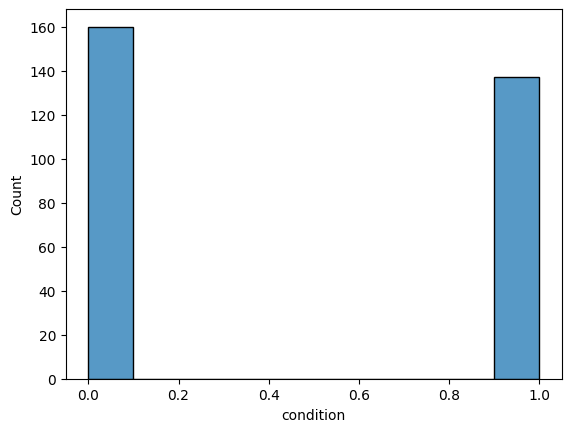

In [19]:
# Целевая переменная. Классы практически сбалансированы, так что все ок.
sns.histplot(df['condition'])

<AxesSubplot:>

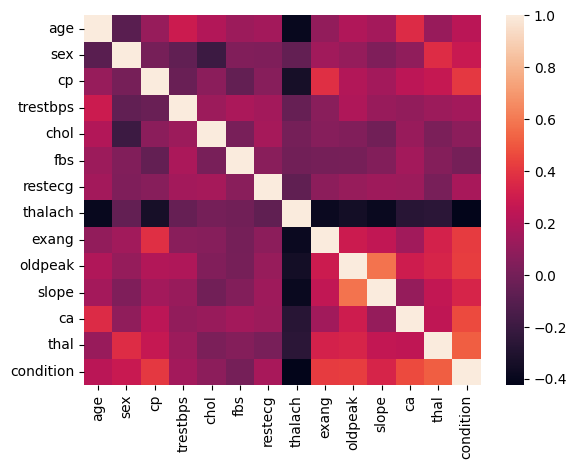

In [20]:
sns.heatmap(df.corr())

## Очистка данных

In [21]:
def fit_model_and_result(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_transform = scaler.transform(X_train)
    model.fit(X_transform, y_train)
    y_pred = model.predict(scaler.transform(X_test))
    print(classification_report(y_test, y_pred))

In [22]:
# Попробуем поубирать признаки, которые показались не информативными.
# Baseline решение
fit_model_and_result(X_train, X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        38
           1       0.75      0.81      0.78        37

    accuracy                           0.77        75
   macro avg       0.78      0.77      0.77        75
weighted avg       0.78      0.77      0.77        75



In [23]:
fit_model_and_result(X_train.drop(columns=['fbs', 'chol', 'trestbps']), X_test.drop(columns=['fbs', 'chol', 'trestbps']), y_train, y_test)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        38
           1       0.74      0.78      0.76        37

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.76      0.76      0.76        75



## Feature engineering

In [24]:
# В качестве baseline решения теперь будем использовать следующую модель
fit_model_and_result(X_train.drop(columns=['fbs', 'chol', 'trestbps']), X_test.drop(columns=['fbs', 'chol', 'trestbps']), y_train, y_test)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        38
           1       0.74      0.78      0.76        37

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.76      0.76      0.76        75



In [25]:
def zero_or_not(df, column, treshold=0):
    df_ = df.copy()
    df_[column] = (df_[column] > treshold).astype(int)
    return df_

In [26]:
model = LogisticRegression()

X_train_ = X_train.drop(columns=['fbs', 'chol', 'trestbps'])
X_test_ = X_test.drop(columns=['fbs', 'chol', 'trestbps'])

# Объединяем все плохое в один класс
X_train_ = zero_or_not(X_train_, 'thal')
X_test_ = zero_or_not(X_test_, 'thal')

X_train_ = zero_or_not(X_train_, 'ca')
X_test_ = zero_or_not(X_test_, 'ca')

X_train_ = zero_or_not(X_train_, 'slope')
X_test_ = zero_or_not(X_test_, 'slope')

X_train_ = zero_or_not(X_train_, 'restecg')
X_test_ = zero_or_not(X_test_, 'restecg')

X_train_ = zero_or_not(X_train_, 'cp', 2.9)
X_test_ = zero_or_not(X_test_, 'cp', 2.9)

fit_model_and_result(X_train_, X_test_, y_train, y_test)

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        38
           1       0.76      0.86      0.81        37

    accuracy                           0.80        75
   macro avg       0.81      0.80      0.80        75
weighted avg       0.81      0.80      0.80        75



Ура, качество улучшилось!